In [20]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../')

from scipy.special import expit

from functools import reduce

from utils.constants import CLASSES

from matplotlib import pyplot as plt

In [ ]:
logits = np.load('../pseudo/timm_efficientnet_b5_unet_24bs_640res_qubvelaugs_ls005_shedchanged_startpoint_difflrs_segbranch_113coefs_1e4noseg_bigholes_swa_roc_auc_flips_transp.npz')

In [ ]:
logits.files

In [ ]:
probs = expit(logits['oof_logits']).mean(0).mean(0)

In [ ]:
probs.shape

In [ ]:
ZERO_CONF = 0.1
ONE_CONF = 0.25

pseudo_mask = reduce(lambda x,y: x&y, [(probs[:,i] > 1 - ONE_CONF) | (probs[:, i] < ZERO_CONF) for i in range(11)])

In [ ]:
probs[(pseudo_mask) & (probs[:,2] < 0.5)][:,2].max()

In [ ]:
probs[:,2] > 0.5

In [ ]:
sum(np.random.randn(1,2,3))

In [9]:
df_1 = pd.read_csv('../pseudo/timm_efficientnet_b5_unet_24bs_640res_qubvelaugs_ls005_shedchanged_startpoint_difflrs_segbranch_113coefs_1e4noseg_bigholes_swa_roc_auc_flips_transp_01_025.csv')
df_2 = pd.read_csv('../pseudo/timm_efficientnet_b5_unet_24bs_640res_qubvelaugs_ls005_shedchanged_startpoint_difflrs_segbranch_113coefs_swa_roc_auc_flips_transp_01_025.csv')
df_3 = pd.read_csv('../pseudo/timm_efficientnet_b5_unet_24bs_640res_qubvelaugs_ls005_shedchanged_startpoint_difflrs_segbranch_113coefs_1e4noseg_bigholes_pseudo_swa_roc_auc_flips_transp_01_015.csv')

In [14]:
df_1.shape

(9408, 30)

In [10]:
additional_raws = set(df_3['StudyInstanceUID']) - set(df_1['StudyInstanceUID'])

len(additional_raws)

8290

In [11]:
df = pd.concat([
    df_1,
    df_3[df_3['StudyInstanceUID'].isin(additional_raws)]
]).reset_index(drop=True)

In [23]:
original_train = pd.read_csv('/data/train.csv')

In [18]:
df = df[['StudyInstanceUID'] + CLASSES]

df

StudyInstanceUID  ETT - Abnormal  ETT - Borderline  ETT - Normal  \
0         00000016_000               0                 0             0   
1         00000017_002               0                 0             0   
2         00000025_000               0                 0             0   
3         00000032_005               0                 0             0   
4         00000032_019               0                 0             0   
...                ...             ...               ...           ...   
17693     00030745_000               0                 0             0   
17694     00030764_000               0                 0             0   
17695     00030768_000               0                 0             0   
17696     00030776_000               0                 0             0   
17697     00030786_005               0                 0             0   

       NGT - Abnormal  NGT - Borderline  NGT - Incompletely Imaged  \
0                   0                 0                          0   
1                   0                 0                          0   
2                   0                 0                          0   
3                   0                 0                          0   
4                   0                 0                          0   
...               ...               ...                        ...   
17693               0                 0                          0   
17694               0                 0                          0   
17695               0                 0                          0   
17696               0                 0                          0   
17697               0                 0                          0   

       NGT - Normal  CVC - Abnormal  CVC - Borderline  CVC - Normal  \
0                 0               0                 0             1   
1                 0               0                 0             1   
2                 0               0                 1             0   
3                 0               0                 0             1   
4                 0               0                 0             1   
...             ...             ...               ...           ...   
17693             0               0                 1             0   
17694             0               0                 1             0   
17695             0               0                 1             0   
17696             0               0                 1             0   
17697             0               0                 0             1   

       Swan Ganz Catheter Present  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  
...                           ...  
17693                           0  
17694                           0  
17695                           0  
17696                           0  
17697                           0  

[17698 rows x 12 columns]

In [28]:
CLASSES

['ETT - Abnormal',
 'ETT - Borderline',
 'ETT - Normal',
 'NGT - Abnormal',
 'NGT - Borderline',
 'NGT - Incompletely Imaged',
 'NGT - Normal',
 'CVC - Abnormal',
 'CVC - Borderline',
 'CVC - Normal',
 'Swan Ganz Catheter Present']

In [35]:
shorten_df_part_1 = df[
    (df['ETT - Normal'] == 1) | 
    (df['NGT - Incompletely Imaged'] == 1) |
    (df['NGT - Normal'] == 1) |
    (df['CVC - Abnormal'] == 1) |
    (df['Swan Ganz Catheter Present'] == 1) 
]

In [36]:
shorten_df_part_2 = df[df['CVC - Borderline'] == 1]

In [39]:
shorten_df = pd.concat([
    shorten_df_part_1,
    shorten_df_part_2.iloc[:5_000,:]
])

shorten_df = shorten_df.sample(frac=1).reset_index(drop=True)

In [42]:
shorten_df.to_csv('../pseudo/first_third_selected_minor_classes.csv', index=False)

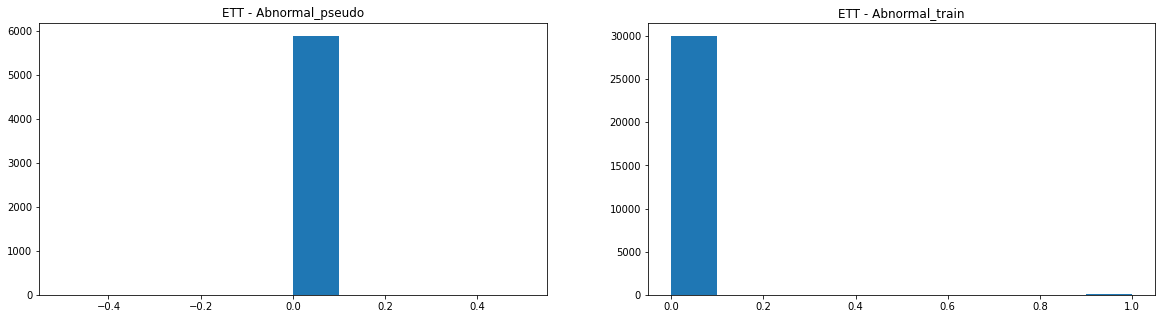

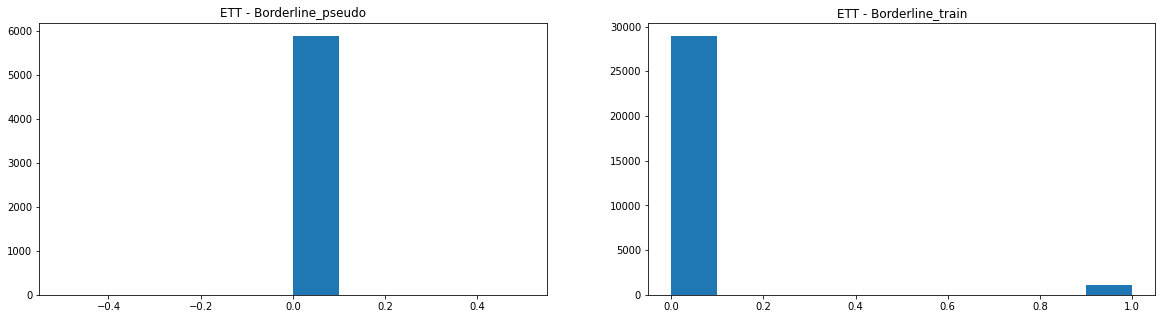

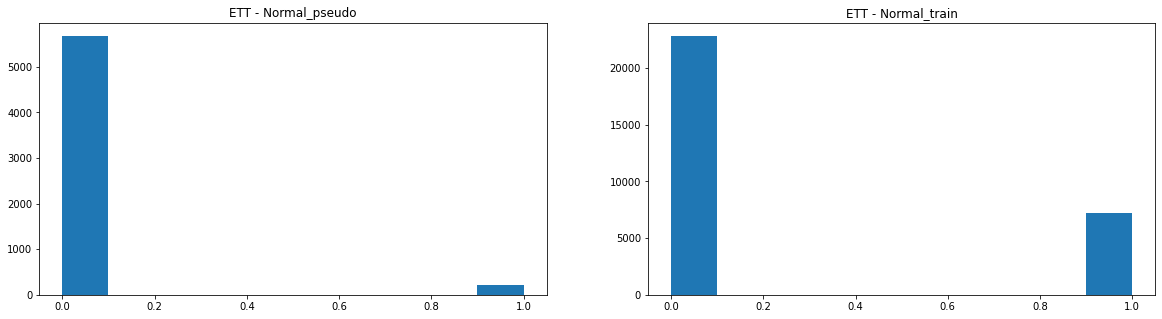

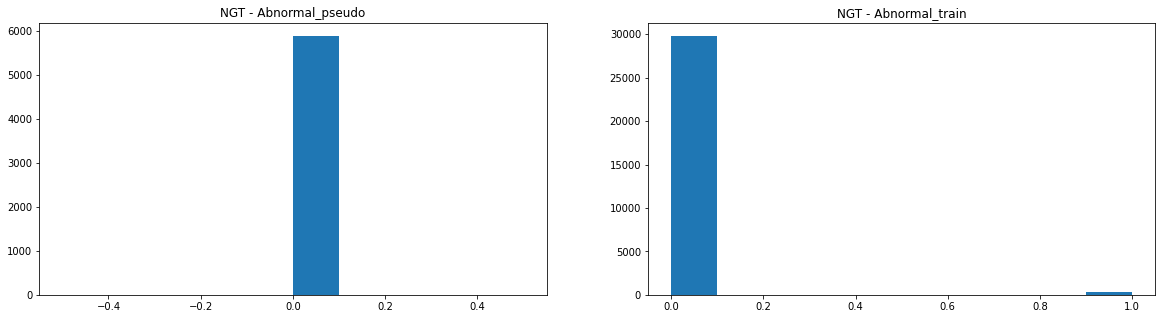

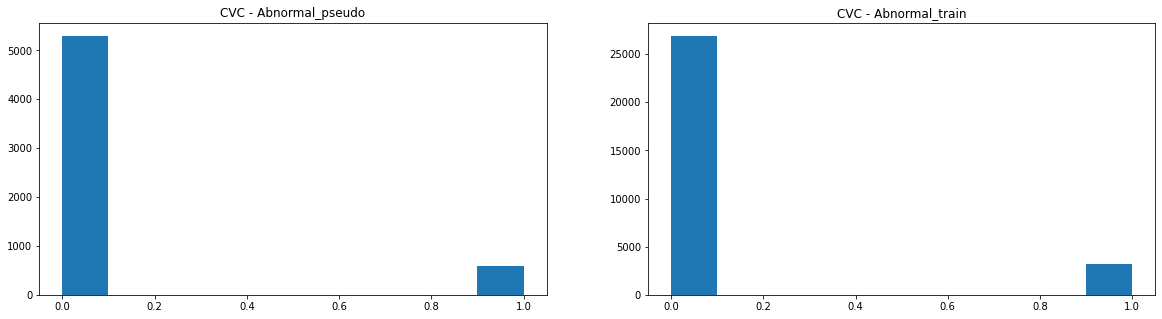

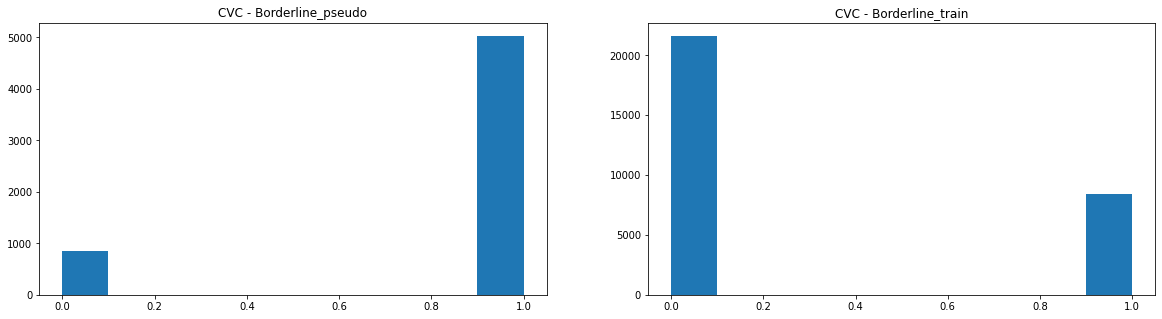

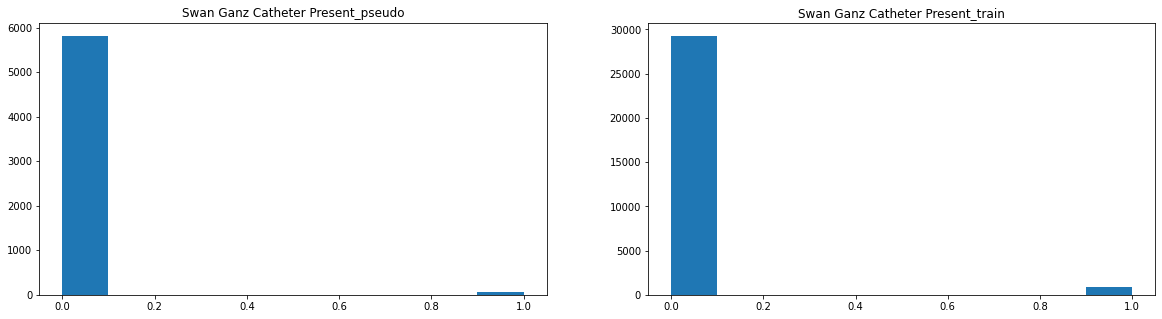

In [40]:
for cls_name in CLASSES:
    plt.figure(figsize=(20, 5))
    
    ax = plt.subplot(1,2,1)
    ax.set_title(cls_name + '_pseudo')
    ax.hist(shorten_df[cls_name])
    
    ax = plt.subplot(1,2,2)
    ax.set_title(cls_name + '_train')
    ax.hist(original_train[cls_name])
    
    plt.show()

In [12]:
df.to_csv('../pseudo/two_first_pseudo_merged.csv', index=False)

In [ ]:
df_3